# Random Forest in Machine Learning

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png" height=500 width=500>


## Load the Data

In [229]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [230]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [231]:
df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [232]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Handling Large Datasets

In [25]:
%%time
large_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

CPU times: user 212 ms, sys: 52.6 ms, total: 265 ms
Wall time: 341 ms


### Load Required Columns

Provideing the `usecols` argument to `read_csv` create a dataframe with just the given columns as it reduces the loading time, and uses lesser memory.

In [29]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [30]:
selected_cols = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 
                 'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']

In [31]:
%%time
large_df2 = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv', usecols=selected_cols)

CPU times: user 193 ms, sys: 52.8 ms, total: 246 ms
Wall time: 275 ms


### Smaller Data Types

In [35]:
large_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [36]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [32]:
selected_cols = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 
                 'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']

In [41]:
selected_dtypes = {
    'MinTemp': 'float16',
    'MaxTemp': 'float16',
    'Rainfall': 'float16',
    'WindGustSpeed': 'float16',
    'WindSpeed9am': 'float16',
    'WindSpeed3pm':'float16' ,
    'Humidity9am':'float16' ,
    'Humidity3pm':'float16' ,
    'Pressure9am':'float16' ,
    'Pressure3pm': 'float16',
    'Temp9am':'float16' ,
    'Temp3pm':'float16' ,
}

In [42]:
%%time
large_df3 = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv', 
                            usecols=selected_cols, 
                            dtype=selected_dtypes, 
                            parse_dates=['Date'])

CPU times: user 213 ms, sys: 36.9 ms, total: 250 ms
Wall time: 276 ms


In [234]:
large_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float16       
 3   MaxTemp        144199 non-null  float16       
 4   Rainfall       142199 non-null  float16       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float16       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float16       
 10  WindSpeed3pm   142398 non-null  float16       
 11  Humidity9am    142806 non-null  float16       
 12  Humidity3pm    140953 non-null  float16       
 13  Pressure9am    130395 non-null  float16       
 14  Pressure3pm    130432 non-null  float16       
 15  

### Using Dask

In [72]:
!python -m pip install dask -q

In [76]:
%%time
accidents_df = pd.read_csv('us-accidents/US_Accidents_Dec20_updated.csv')

CPU times: user 7.5 s, sys: 1.97 s, total: 9.47 s
Wall time: 11 s


In [73]:
import dask.dataframe as dd

In [82]:
%%time 

accidents_df2 = dd.read_csv('us-accidents/US_Accidents_Dec20_updated.csv',dtype={'Zipcode': 'object'})  

CPU times: user 9.06 ms, sys: 16.4 ms, total: 25.5 ms
Wall time: 112 ms


In [236]:
accidents_df.Zipcode

0          43017
1          45424
2          45203
3          45202
4          44311
           ...  
1516059    92501
1516060    92108
1516061    92866
1516062    90230
1516063    92346
Name: Zipcode, Length: 1516064, dtype: object

In [235]:
accidents_df2

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
npartitions=8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,int64,object,object,float64,float64,float64,float64,float64,object,float64,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,float64,float64,object,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [85]:
%%time 

acc_df2 = accidents_df2.compute()

CPU times: user 13.2 s, sys: 4.68 s, total: 17.9 s
Wall time: 12.5 s


In [86]:
acc_df2

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193851,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
193852,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
193853,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
193854,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


### Working with Sample

In [87]:
%%time
accidents_sample_df = pd.read_csv('us-accidents/US_Accidents_Dec20_updated.csv',  
                                  nrows=300000)

CPU times: user 460 ms, sys: 80.6 ms, total: 541 ms
Wall time: 595 ms


In [88]:
accidents_sample_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.11206,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.86501,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.10209,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.101480,-84.523410,39.09841,-84.522410,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.06217,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-2816595,4,2016-11-11 13:15:09,2016-11-11 19:15:09,33.610270,-112.222731,33.61061,-112.202610,1.158,Closed between 75th Ave and 67th Ave - Road cl...,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-2816596,4,2016-11-11 13:15:09,2016-11-11 19:15:09,33.610610,-112.202610,33.61027,-112.222731,1.158,Closed between 67th Ave and 75th Ave - Road cl...,...,False,False,False,False,True,False,Day,Day,Day,Day
99997,A-2816597,2,2016-11-11 13:25:47,2016-11-11 19:25:47,32.221440,-110.943840,32.22144,-110.944070,0.013,At Campbell Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
99998,A-2816598,2,2016-11-11 13:25:47,2016-11-11 19:25:47,32.221440,-110.944070,32.22144,-110.943840,0.013,At Campbell Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
- Load only required columns - usecols
- Reduce the datatypes - dtype
- Dask dataframe
- Sampling - nrows

## Clean the Data

In [241]:
82670/145460

0.568334937439846

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
yes,no,no,yes,NaN

In [ ]:
calculate store sales when it is closed

In [6]:
df.columns[df.isna().sum()>1]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.RainTomorrow.isna().sum()

3267

In [11]:
#(3267/145460)*100

In [246]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [14]:
df.columns[df.isna().sum()>1]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [16]:
df.RainToday.isna().sum()

1406

In [242]:
df.dropna(subset=['RainToday'], inplace=True)

In [244]:
df.RainToday.isna().sum()

0

In [247]:
df.RainTomorrow.isna().sum()

0

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142199 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142199 non-null  object 
 1   Location       142199 non-null  object 
 2   MinTemp        141712 non-null  float64
 3   MaxTemp        141729 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    81711 non-null   float64
 6   Sunshine       74379 non-null   float64
 7   WindGustDir    132474 non-null  object 
 8   WindGustSpeed  132534 non-null  float64
 9   WindDir9am     132410 non-null  object 
 10  WindDir3pm     138400 non-null  object 
 11  WindSpeed9am   141108 non-null  float64
 12  WindSpeed3pm   139552 non-null  float64
 13  Humidity9am    140645 non-null  float64
 14  Humidity3pm    138569 non-null  float64
 15  Pressure9am    128259 non-null  float64
 16  Pressure3pm    128206 non-null  float64
 17  Cloud9am       88868 non-null

In [18]:
#df['RainToday'] = df['RainToday'].bfill()

In [20]:
df.columns[df.isna().sum()>1]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object')

In [249]:
(2630/140000)*100

1.8785714285714283

In [21]:
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [92]:
82670/145460

0.568334937439846

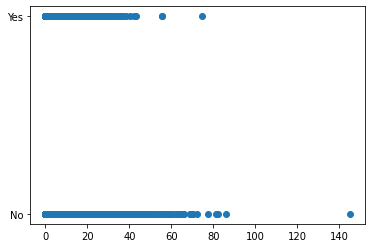

In [110]:
plt.scatter(df.Evaporation,df.RainTomorrow);

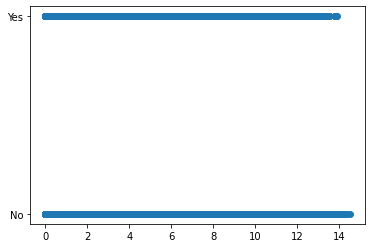

In [111]:
plt.scatter(df.Sunshine,df.RainTomorrow);

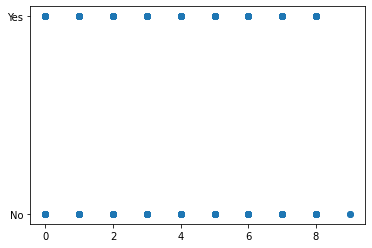

In [114]:
plt.scatter(df.Cloud9am,df.RainTomorrow);

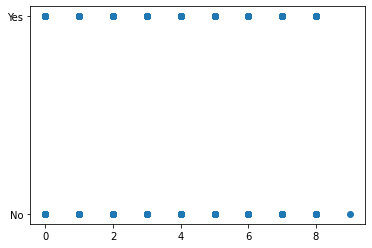

In [115]:
plt.scatter(df.Cloud3pm,df.RainTomorrow);

## Feature Engineering

In [250]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [ ]:
creating new column with existing columns

dropping unnecessary columns

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [252]:
df['Date'] = pd.to_datetime(df['Date'])

In [253]:
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

In [255]:
#df

In [256]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
#numerical data as the input

#we can convert categorical to numerical - using encoding

In [257]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

## Split the Data

In [258]:
from sklearn.model_selection import train_test_split

In [ ]:
date column - 

In [265]:
df.Year.value_counts()

2016    17341
2014    17181
2015    17089
2009    16514
2010    16191
2013    15935
2011    14983
2012    14894
2017     8369
2008     2229
2007       61
Name: Year, dtype: int64

In [268]:
train_df = df[df.Year<2015]

val_df = df[df.Year==2015]

test_df = df[df.Year>2015]

In [259]:
#train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [260]:
#train_df, val_df = train_test_split(train_val_df,test_size=0.25,random_state=42)

In [269]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [270]:
#In what scenario would you consider the train/test split dependent on date/time

In [271]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [272]:
inputs = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Day', 'Month', 'Year']

In [273]:
target = 'RainTomorrow'

In [274]:
train_inputs = train_df[inputs]
train_target = train_df[target]

In [275]:
val_inputs = val_df[inputs]
val_target = val_df[target]

In [276]:
test_inputs = test_df[inputs]
test_target = test_df[target]

In [ ]:
load, clean - held off handling missing data, feature engineering, splitting


scaling & encoding

Imputation - to handle missing data

## Handling Missing Numerical Data with Imputation

In [135]:
numerics = train_inputs.select_dtypes(include=np.number).columns.tolist()
categoricals = train_inputs.select_dtypes('object').columns.tolist()

In [299]:
from sklearn.impute import SimpleImputer

In [300]:
imputer = SimpleImputer(strategy = 'mean').fit(df[numerics])

In [301]:
train_inputs[numerics] = imputer.transform(train_inputs[numerics])
val_inputs[numerics] = imputer.transform(val_inputs[numerics])
test_inputs[numerics] = imputer.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/3474667909.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/3474667909.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/3474667909.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [302]:
train_inputs[numerics].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

In [278]:
cat_imputer = SimpleImputer(strategy = 'most_frequent').fit(df[categoricals])

In [279]:
train_inputs[categoricals] = cat_imputer.transform(train_inputs[categoricals])
val_inputs[categoricals] = cat_imputer.transform(val_inputs[categoricals])
test_inputs[categoricals] = cat_imputer.transform(test_inputs[categoricals])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/3549140744.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/3549140744.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/3549140744.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [280]:
train_inputs[categoricals].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [146]:
df['WindGustDir'].mode()[0]

'W'

In [282]:
#train_df[categoricals]

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140319 non-null  float64
 2   MaxTemp        140480 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81093 non-null   float64
 5   Sunshine       73982 non-null   float64
 6   WindGustDir    131624 non-null  object 
 7   WindGustSpeed  131682 non-null  float64
 8   WindDir9am     131127 non-null  object 
 9   WindDir3pm     137117 non-null  object 
 10  WindSpeed9am   139732 non-null  float64
 11  WindSpeed3pm   138256 non-null  float64
 12  Humidity9am    139270 non-null  float64
 13  Humidity3pm    137286 non-null  float64
 14  Pressure9am    127044 non-null  float64
 15  Pressure3pm    127018 non-null  float64
 16  Cloud9am       88162 non-null   float64
 17  Cloud3pm       84693 non-null

In [147]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

## Preprocessing the Data

### Scaling

In [285]:
from sklearn.preprocessing import StandardScaler

In [303]:
scaler = StandardScaler().fit(df[numerics])

In [304]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/4072025852.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/4072025852.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/4072025852.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [306]:
train_inputs[numerics].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

In [156]:
train_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000,85315.000000
mean,-1.826980,-3.188847,-0.276854,-1.296903,-1.877221,-2.923073,-1.562328,-2.092796,-3.577513,-2.450668,-143.135199,-144.194725,-1.366317,-1.471506,-2.537758,-3.051121,-1.730405,-1.724879,-791.809458
std,0.023515,0.018904,0.002723,0.005265,0.049694,0.007486,0.007669,0.011386,0.009955,0.009868,0.015708,0.015204,0.087549,0.086026,0.021060,0.019030,0.033313,0.090835,0.100123
min,-1.903156,-3.263292,-0.277606,-1.305911,-2.016357,-2.942456,-1.574441,-2.117109,-3.613616,-2.475399,-143.218129,-144.278982,-1.536956,-1.655201,-2.616355,-3.126057,-1.786187,-1.868541,-792.035974
25%,-1.843855,-3.203003,-0.277606,-1.299325,-1.877298,-2.928194,-1.568387,-2.100135,-3.583697,-2.457609,-143.144852,-144.204401,-1.421495,-1.491839,-2.552994,-3.064914,-1.759666,-1.815479,-791.878571
50%,-1.827649,-3.190255,-0.277606,-1.296905,-1.877298,-2.923630,-1.563197,-2.092775,-3.577398,-2.450645,-143.135190,-144.194719,-1.366183,-1.471290,-2.538372,-3.052187,-1.729356,-1.735885,-791.799869
75%,-1.809969,-3.175647,-0.277351,-1.296905,-1.857690,-2.919637,-1.558007,-2.085773,-3.570049,-2.444146,-143.125545,-144.185301,-1.306035,-1.410158,-2.523100,-3.038354,-1.702836,-1.656291,-791.721168
max,-1.754352,-3.126248,-0.159474,-1.067163,-1.755559,-2.868865,-1.461997,-2.003516,-3.561126,-2.427317,-143.080881,-144.141871,-1.229062,-1.287637,-2.466238,-2.983574,-1.672526,-1.576698,-791.642466


### Encoding

In [288]:
from sklearn.preprocessing import OneHotEncoder

In [289]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categoricals])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [290]:
encoded_cols = list(encoder.get_feature_names_out(categoricals))

In [291]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/4099229682.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/4099229682.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_51070/4099229682.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [292]:
train_inputs[encoded_cols]

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#model.fit(train_inputs[numerics + encoded_cols])

In [307]:
train_inputs = train_inputs[numerics + encoded_cols]
val_inputs = val_inputs[numerics + encoded_cols]
test_inputs = test_inputs[numerics + encoded_cols]

In [308]:
train_inputs[numerics + encoded_cols].isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
Length: 121, dtype: int64

## Fit the Model

### Logistic Regression

In [294]:
from sklearn.linear_model import LogisticRegression

In [336]:
model = LogisticRegression()

In [337]:
import warnings
warnings.filterwarnings("ignore")


In [338]:
model.fit(train_inputs, train_target)

LogisticRegression()

In [310]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [311]:
from sklearn.metrics import accuracy_score

In [312]:
accuracy_score(train_target, train_preds)

0.7980569049271339

In [313]:
accuracy_score(val_target, val_preds)

0.8052548422962139

In [314]:
df.RainTomorrow.value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [315]:
from sklearn.metrics import f1_score

In [ ]:
0.97

In [ ]:
0.89

In [316]:
pos_label='Yes'

In [317]:
f1_score(train_target, train_preds,pos_label=pos_label)

0.3589062398755913

In [318]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.30982994608046455

### Decision Tree Classifier

In [319]:
from sklearn.tree import DecisionTreeClassifier

In [320]:
model = DecisionTreeClassifier(class_weight='balanced')

In [321]:
model.fit(train_inputs, train_target)

DecisionTreeClassifier(class_weight='balanced')

In [322]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [323]:
f1_score(train_target, train_preds,pos_label=pos_label)

1.0

In [324]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.4944243301955104

### Random Forest Classifier

In [325]:
from sklearn.ensemble import RandomForestClassifier

In [326]:
model = RandomForestClassifier(class_weight='balanced')

In [327]:
model.fit(train_inputs, train_target)

RandomForestClassifier(class_weight='balanced')

In [328]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [329]:
f1_score(train_target, train_preds,pos_label=pos_label)

0.999977061589632

In [330]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.5395075339948548

## Hyperparameter Tuning

In [ ]:
#n_estimators = 3

In [ ]:
# row 1 - wind-56, cloud-7, pressure-67.8 - decision tree 1 - predictions - yes - 1.3

# row 1 - wind-56, cloud-7, pressure-67.8 - decision tree 2 - predictions - yes - 1.45

# row 1 - wind-56, cloud-7, pressure-67.8 - decision tree 3 - predictions - no - 1.35 

# row 1 - final prediction - yes

In [ ]:
#random forest - bunch of decision trees ??? - n_estimators = 100

In [331]:
?RandomForestClassifier

In [339]:
model = RandomForestClassifier(n_estimators=150,max_depth=75, random_state=40,class_weight='balanced')

In [350]:
model.fit(train_inputs,train_target)

RandomForestClassifier(max_depth=75, n_estimators=150, random_state=40)

In [341]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [342]:
f1_score(train_target, train_preds,pos_label=pos_label)

1.0

In [343]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.5424164524421593

## Stratified K-fold Cross Validation

For a classification problem, especially when dealing with imbalanced datasets, it's common to use stratified k-fold cross-validation. Stratified k-fold ensures that the class distribution is approximately the same in each fold as it is in the entire dataset. This helps prevent situations where one fold may have significantly fewer instances of a particular class, leading to biased evaluation.

In [344]:
# Concatenate DataFrames
combined_inputs = pd.concat([train_inputs, val_inputs], axis=0, ignore_index=True)

In [345]:
combined_outputs = pd.concat([train_target, val_target], axis=0, ignore_index=True)

In [205]:
#sklearn.metrics.get_scorer_names()

In [346]:
model = RandomForestClassifier(n_estimators=150,max_depth=75, random_state=40)

In [347]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

combined_outputs_numeric = combined_outputs.replace({'No': 0, 'Yes': 1})
f1_scores = cross_val_score(model, combined_inputs, combined_outputs_numeric, cv=stratified_kfold, scoring='f1')


# Print the cross-validation scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1:", f1_scores.mean())

Cross-Validation RMSE Scores: [0.61591449 0.61000967 0.61131081 0.60611165 0.61372877]
Mean RMSE: 0.6114150773795256


- Drop columns with more than 50% missing data

- Split randomly & check score

- Perform manual tuning with more parameters

- Perform GridSearchCV

In [211]:
#Perform GridSearchCV on your Own

In [351]:
test_preds = model.predict(test_inputs)

In [352]:
f1_score(test_target, test_preds,pos_label=pos_label)

0.5764581124072109

In [353]:
model.feature_importances_

array([0.03941453, 0.03933232, 0.04285945, 0.02233514, 0.05707223,
       0.04229322, 0.02591017, 0.0284965 , 0.04822168, 0.12897997,
       0.04675351, 0.05307181, 0.02168265, 0.02821648, 0.0365616 ,
       0.04285631, 0.02877537, 0.02181881, 0.01823745, 0.00134961,
       0.00150937, 0.00134476, 0.00057413, 0.0011717 , 0.00111844,
       0.00118526, 0.00134021, 0.00104345, 0.00153987, 0.00092513,
       0.0017514 , 0.00118903, 0.00067764, 0.00115225, 0.00144197,
       0.00027933, 0.00122782, 0.00098949, 0.00112643, 0.00087582,
       0.00085064, 0.00144036, 0.000894  , 0.00062356, 0.0004714 ,
       0.00138407, 0.00148254, 0.00120485, 0.00080559, 0.0008219 ,
       0.00148544, 0.00116768, 0.00174957, 0.00103594, 0.0013735 ,
       0.00094758, 0.00154617, 0.00135957, 0.00068043, 0.00126837,
       0.00021955, 0.0010804 , 0.00177761, 0.00130972, 0.00130932,
       0.00206947, 0.00142104, 0.00072102, 0.00206893, 0.00185408,
       0.00191683, 0.00310005, 0.00239352, 0.00242187, 0.00275

In [354]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numerics + encoded_cols].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [355]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.128980
4,Sunshine,0.057072
11,Pressure3pm,0.053072
8,Humidity9am,0.048222
10,Pressure9am,0.046754
2,Rainfall,0.042859
15,Temp3pm,0.042856
5,WindGustSpeed,0.042293
0,MinTemp,0.039415
1,MaxTemp,0.039332


In [356]:
import seaborn as sns

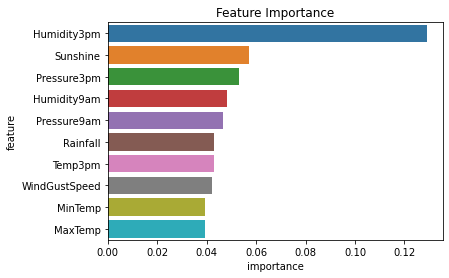

In [357]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Saving and Loading Trained Models

In [358]:
import joblib

In [361]:
data = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': inputs,
    'target_col': target,
    'numeric_cols': numerics,
    'categorical_cols': categoricals,
    'encoded_cols': encoded_cols
}

In [362]:
joblib.dump(data, 'rf_class_aus_rain.joblib')

['rf_class_aus_rain.joblib']

In [363]:
rf_class_aus_rain = joblib.load('rf_class_aus_rain.joblib')

In [364]:
test_preds2 = rf_class_aus_rain['model'].predict(test_inputs)
f1_score(test_target, test_preds2,pos_label=pos_label)

0.5764581124072109

### Exercise


**Tasks:**
1. Select a dataset from Kaggle with Regression Problem.
2. Load the dataset and explore its structure.
3. Create new features using Feature Engineering Techniques
3. Preprocess the data: 
    - Handle missing values
    - Scale numerical variables
    - Encode categorical variables
    - Split the data into training, validation and testing sets.
4. Fit Linear & Tree based models.
5. Compare the train & validations scores. Pick the best model
6. Improve scores using Hyperparameter Tuning, GridSearchCV & KFold cross validation.
7. Explain the final model using Feature Importance
8. Save the final models.